In [ ]:
# import autoreload
# %load_ext autoreload
# %aimport Trainer
# %autoreload 1

In [1]:
import pandas as pd
from importlib import reload

## Configs

In [2]:
BATCH_SIZE = 64

## Preprocessing
Negative Sampling the dataset

In [9]:
from src.Preprocess.Preprocessor import Preprocessor
Preprocessor.create_negative_sampled_dataset(input_address="data/SA_history_clicks_of_98.csv", 
                                               output_address="data/data5.pkl", 
                                               neg_to_pos_ratio=5)

Reading input file data/SA_history_clicks_of_98.csv



File created at data/data5.pkl


,queryText,packageName,similar
0,توشمال,com.example.masood.yocheneapp,1
1,rush,com.ketchapp.rush,1
2,شب چله,yalda.ir.kr.si.ma.usn,1
3,عشق,com.roman.jadogareeshgh,1
4,کلابی,ir.mmdali.cluby,1
...,...,...,...
65689147,کاهتهتخنتالفل 644 علیر,ir.skrsoft.racing_game,-1
65689148,کاهتهتخنتالفل 644 علیر,tirazissoftware.hokme.games,-1
65689149,کاهتهتخنتالفل 644 علیر,com.Eggbones.AttackOnBall,-1
65689150,کاهتهتخنتالفل 644 علیر,ir.alimoradian.diabet,-1


## DatasetHandler
Preparing dataset for training

In [11]:
from src.Trainer.DatasetHandler import DatasetHandler

# dataset_handler = DatasetHandler("data/SA_history_clicks_of_98.csv")
dataset_handler = DatasetHandler("data/data5.pkl", frac=0.01)
# dataset_handler = DatasetHandler("data/data1.pkl")

Loading tokenizer...
Reading input file...



Creating dataset...



Done


In [31]:
import pandas as pd
# dataset_handler.df.loc[dataset_handler.df["similar"] == 0]
print(dataset_handler.get_dataset())
dataset_handler.df
pd.DataFrame(dataset_handler.get_dataset()["train"][:1000])

DatasetDict({
    train: Dataset({
        features: ['__index_level_0__', 'attention_mask', 'input_ids', 'packageName', 'package_ids', 'queryText', 'similar', 'token_type_ids'],
        num_rows: 525513
    })
    test: Dataset({
        features: ['__index_level_0__', 'attention_mask', 'input_ids', 'packageName', 'package_ids', 'queryText', 'similar', 'token_type_ids'],
        num_rows: 131379
    })
})


,__index_level_0__,attention_mask,input_ids,packageName,package_ids,queryText,similar,token_type_ids
0,38335,"[1, 1, 1, 1, 1, 0, 0, 0]","[2, 4873, 5498, 3266, 4, 0, 0, 0]",appinventor.ai_test.Onion2,[25865],صدای زنگ گوشی,-1,"[0, 0, 0, 0, 0, 0, 0, 0]"
1,345302,"[1, 1, 1, 1, 0, 0, 0, 0]","[2, 4867, 9544, 4, 0, 0, 0, 0]",com.siminappsras.alaaldin,[7845],صلاح الدین,1,"[0, 0, 0, 0, 0, 0, 0, 0]"
2,174338,"[1, 1, 1, 0, 0, 0, 0, 0]","[2, 11271, 4, 0, 0, 0, 0, 0]",app.biiii.me,[58854],منج,-1,"[0, 0, 0, 0, 0, 0, 0, 0]"
3,166717,"[1, 1, 1, 1, 0, 0, 0, 0]","[2, 36964, 1157, 4, 0, 0, 0, 0]",ziarat.adye,[77220],ساقیا,-1,"[0, 0, 0, 0, 0, 0, 0, 0]"
4,325994,"[1, 1, 1, 1, 0, 0, 0, 0]","[2, 25598, 1, 4, 0, 0, 0, 0]",a.lire.zaaghajani,[13073],cs 5,-1,"[0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...
995,290219,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 62785, 7892, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",aluche.sakhtekeshvar,[39446],made in,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
996,397872,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 3177, 3568, 23624, 2027, 4, 0, 0, 0, 0, 0,...",com.pubcolor.paint,[29688],اخرین نسخه وامیار,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
997,619950,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 3663, 4855, 12798, 4, 0, 0, 0, 0, 0, 0, 0,...",ir.asystem.amoozeshtarkiberangemooherfeefree,[8302],مدل لباس مجلسی,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
998,307236,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 3852, 3827, 3899, 3330, 4, 0, 0, 0, 0, 0, ...",ir.zinabeyon.komil,[73986],رنگ انواع رژ لب,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## Training

Train on 525513 samples, test on 131379 samples
B
----------------



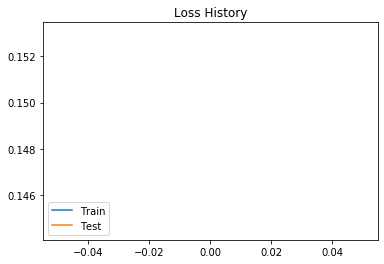

----------------



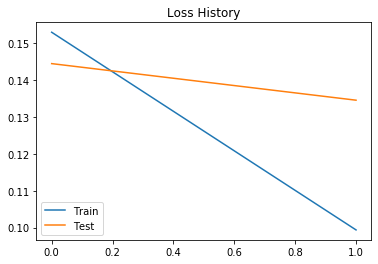

----------------



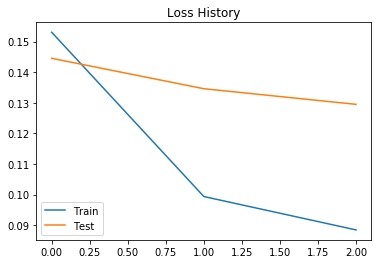

----------------



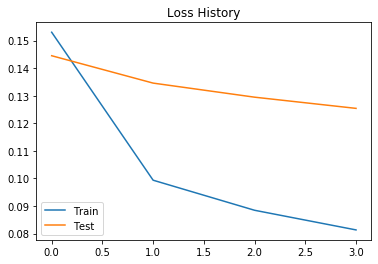

----------------



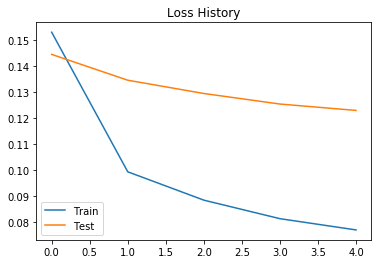

In [27]:
import src.Trainer.RepresentationBuilder
reload(src.Trainer.RepresentationBuilder)
import src.Trainer.QueryAdCoordinator
reload(src.Trainer.QueryAdCoordinator)
import src.Trainer.Trainer
reload(src.Trainer.Trainer)

trainer = src.Trainer.Trainer.Trainer(embedding_dim=50, dataset_handler=dataset_handler)
trainer.train(epochs=5)

In [28]:
trainer.query_ad_coordinator

QueryAdCoordinator(
  (query_representation_builder): RepresentationBuilder(
    (embedding): Embedding(100000, 50)
    (pooling_module): SpanPoolingAvg()
  )
  (ad_representation_builder): RepresentationBuilder(
    (embedding): Embedding(93592, 50)
    (pooling_module): SpanPoolingAvg()
  )
  (loss): CosineEmbeddingLoss()
)

In [29]:
trainer.save_model(save_address="representations/QueryAdCoordinator_checkpoint.pt")

Model saved at representations/QueryAdCoordinator_checkpoint.pt


In [30]:
trainer.save_all_ad_representations(ad_reprs_address="representations/ad_reprs.pt", 
                                    id_to_package_address="representations/id_to_package.pkl")


torch.Size([93592, 50])
Saved ad representations at representations/ad_reprs.pt


## Prediction

In [49]:
import src.Predictor.Predictor
reload(src.Predictor.Predictor)

predictor = src.Predictor.Predictor.Predictor(ad_reprs_address="representations/ad_reprs.pt",
                                id_to_package_address="representations/id_to_package.pkl",
                                query_ad_coordinator_checkpoint="representations/QueryAdCoordinator_checkpoint.pt")

Loading tokenizer...
Loading ad representations...
Loading ad id to package...
Loading QueryAdCoordinator...


In [53]:
predictor.predict_from_query("Guns of Boom")

torch.Size([1, 50])
tensor([[ -3.2548, -31.4552, -15.9780,  17.1880,  -3.6761,  -0.7928,  20.4848,
         -22.8895,  20.7606,   0.0830,  -5.9919, -30.4587, -23.3399, -16.1066,
         -24.9658,  -6.7280,  -9.9367, -10.5655,   8.1622, -15.3885,  31.8919,
         -18.1131, -31.3300,  32.5359,   4.4334,  24.7187,   1.9893, -13.0597,
          30.6513, -14.9806,  23.6641,   3.1011,  19.9212,  16.3363, -17.1712,
          29.9512,  20.3634,  16.4735,   8.3160, -17.8717, -20.5131,   2.6877,
         -17.3447,  27.0284, -18.1738, -10.5283,  16.0180, -15.7995,  30.3420,
         -31.3593]], grad_fn=<DivBackward0>)
kNN dist: tensor([0.8972, 0.8958, 0.8930, 0.8919, 0.8914, 0.8913, 0.8910, 0.8906, 0.8903,
        0.8896], grad_fn=<TopkBackward>), index: tensor([38801, 15192, 88587, 47539, 42487, 41470, 32058, 90581,  8894, 81296])
Guns of Boom
dist: 0.90 com.cherrypickgames.olimpiagames2016
dist: 0.90 com.GlimGames.heytaxi
dist: 0.89 com.scoompa.facechanger2
dist: 0.89 com.MagicalWorld.ProPar

In [ ]:
predictor.ad_id_to_package

In [ ]:
stats = pd.DataFrame(dataset_handler.df["packageName"], columns=['packageName'])["packageName"].value_counts()
# print(stats.to_string())
# print(list(stats.index))
print("|Labels| =", len(stats))
# stats.plot(kind='barh', color="green", figsize=(10, 9));

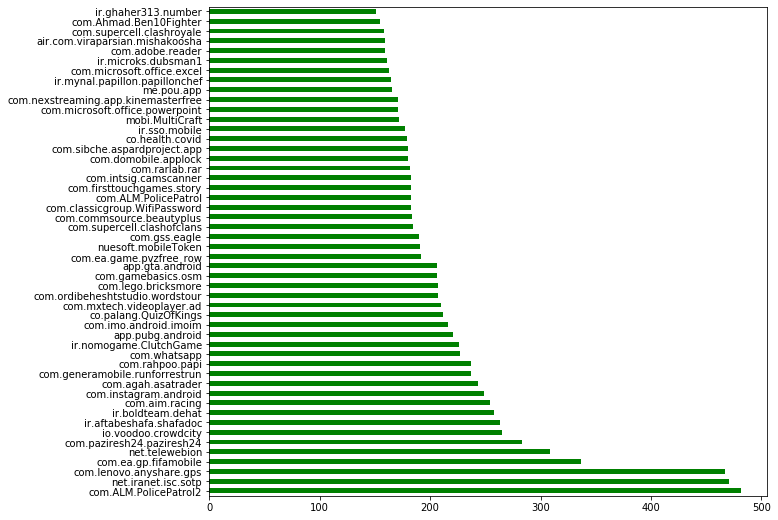

In [45]:
stats[:50].plot(kind='barh', color="green", figsize=(10, 9));

In [43]:
stats[:50]

com.ALM.PolicePatrol2                  481
net.iranet.isc.sotp                    471
com.lenovo.anyshare.gps                467
com.ea.gp.fifamobile                   337
net.telewebion                         309
com.paziresh24.paziresh24              283
io.voodoo.crowdcity                    265
ir.aftabeshafa.shafadoc                263
ir.boldteam.dehat                      258
com.aim.racing                         254
com.instagram.android                  249
com.agah.asatrader                     243
com.generamobile.runforrestrun         237
com.rahpoo.papi                        237
com.whatsapp                           227
ir.nomogame.ClutchGame                 226
app.pubg.android                       221
com.imo.android.imoim                  216
co.palang.QuizOfKings                  212
com.mxtech.videoplayer.ad              210
com.ordibeheshtstudio.wordstour        207
com.lego.bricksmore                    207
com.gamebasics.osm                     206
app.gta.and